# MHC CLUSTERING
## Initialize dataframe
Import parsed output from netMHCpan4.0 peptide-MHC affinity prediction.

In [101]:
import pandas as pd
import numpy as np

my_path = 'C:/Users/sebas/Desktop/School/Ma 2/Stage/Repositories/Peptide-MHC/code/'
    
header = ['A', 'Index in protein' ,'HLA', 'B', 'Peptide', 'Core', 'Of', 'Gp', 'Gl', 'Ip', 'Il', 'Icore', 'Identity', 'Score', 'Rank']
df = pd.read_csv(my_path + 'affinity_clean.txt', sep=',', 
                     names=header)
new = df['Identity'] = df['Identity'].str.split('_', expand=True) # Splits the protein column in 3 new columns
df['Uniprot ID'] = new[1] # Uniprot ID of proteins from which the peptides originate
df['Protein name'] = new[2] # Canonical name of proteins from which the peptides originate
df.drop(columns=['Identity', 'A', 'B'], inplace=True)
    
df

,Index in protein,HLA,Peptide,Core,Of,Gp,Gl,Ip,Il,Icore,Score,Rank,Uniprot ID,Protein name
0,1.0,HLA-B*27:02,MAEPRQEFE,MAEPRQEFE,0.0,0.0,0.0,0.0,0.0,MAEPRQEFE,0.000005,72.5000,P10636,TAU
1,2.0,HLA-B*27:02,AEPRQEFEV,AEPRQEFEV,0.0,0.0,0.0,0.0,0.0,AEPRQEFEV,0.000282,20.4000,P10636,TAU
2,3.0,HLA-B*27:02,EPRQEFEVM,EPRQEFEVM,0.0,0.0,0.0,0.0,0.0,EPRQEFEVM,0.000179,24.3158,P10636,TAU
3,4.0,HLA-B*27:02,PRQEFEVME,PRQEFEVME,0.0,0.0,0.0,0.0,0.0,PRQEFEVME,0.000200,23.3182,P10636,TAU
4,5.0,HLA-B*27:02,RQEFEVMED,RQEFEVMED,0.0,0.0,0.0,0.0,0.0,RQEFEVMED,0.000029,46.0000,P10636,TAU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30990,515.0,HLA-B*08:01,GEHRQDRRE,GEHRQDRRE,0.0,0.0,0.0,0.0,0.0,GEHRQDRRE,0.000079,77.5000,P35637,FUS
30991,516.0,HLA-B*08:01,EHRQDRRER,EHRQDRRER,0.0,0.0,0.0,0.0,0.0,EHRQDRRER,0.002251,25.2263,P35637,FUS
30992,517.0,HLA-B*08:01,HRQDRRERP,HRQDRRERP,0.0,0.0,0.0,0.0,0.0,HRQDRRERP,0.004784,17.7496,P35637,FUS
30993,518.0,HLA-B*08:01,RQDRRERPY,RQDRRERPY,0.0,0.0,0.0,0.0,0.0,RQDRRERPY,0.004834,17.6607,P35637,FUS


## Input matrix
### 1: Select protein from your input list
`df['Protein name']=='protein_from_your_FASTA_file'`
### 2: HLA alleles to columns, drop missing values
### 3: Optional: Apply cut-off and transform to binary matrix
Weak binder < 2 > 0.5

Strong binder < 0.5
### 4: Transpose dataframe to obtain desired format

In [177]:
df_prot = df['Protein name']=='TAU'
df_TAU = df[df_prot]

tau = df_TAU[['Index in protein', 'HLA', 'Rank']]
tau.set_index('Index in protein', inplace=True)

pivot_tau = tau.pivot_table(values='Rank', index=tau.index, columns='HLA', aggfunc='first')
pivot_tau.dropna(inplace=True)

alleles = df['HLA'].unique().tolist()
alleles.pop()

#for allele in alleles:
#    pivot_tau[str(allele)] = np.where(pivot_tau[str(allele)] < 5, 1, pivot_tau[str(allele)])
#    pivot_tau[str(allele)] = np.where(pivot_tau[str(allele)] > 5, 0, pivot_tau[str(allele)])

profile = pivot_tau.transpose()
profile

Index in protein,1.0,4.0,5.0,7.0,9.0,13.0,14.0,15.0,16.0,17.0,...,739.0,740.0,741.0,742.0,743.0,744.0,746.0,748.0,749.0,750.0
HLA,,,,,,,,,,,,,,,,,,,,,
HLA-B*08:01,25.3632,69.2045,77.8571,53.7255,22.2297,46.5667,64.0517,85.3125,59.2000,86.8750,...,21.8714,95.7692,17.9964,70.7353,29.5378,18.7505,55.8000,46.3333,60.6034,2.9169
HLA-B*13:02,65.2206,70.6250,31.6940,57.4648,26.7107,54.7291,75.4286,90.3571,23.6151,93.5714,...,65.1471,60.5670,5.2931,64.8969,6.2473,31.1983,12.3818,64.1237,44.1486,7.0232
HLA-B*14:01,40.0000,46.0000,56.0714,57.1429,19.5974,17.0336,70.3125,82.7778,38.7429,87.8571,...,34.7843,88.5714,20.2683,44.9565,30.0811,16.7681,51.9298,50.8772,76.6667,3.0634
HLA-B*14:02,40.0000,46.0000,56.0714,57.1429,19.5974,17.0336,70.3125,82.7778,38.7429,87.8571,...,34.7843,88.5714,20.2683,44.9565,30.0811,16.7681,51.9298,50.8772,76.6667,3.0634
HLA-B*18:01,39.6667,52.1429,49.3333,49.0000,27.6818,29.8235,72.0000,63.7500,19.7164,59.4444,...,31.5385,75.0000,37.3750,63.1250,31.1538,27.3636,30.6000,29.1176,64.3750,16.2250
HLA-B*18:03,36.0769,50.2500,50.2500,50.2500,22.7119,28.4828,70.8333,65.0000,21.9722,70.0000,...,35.8667,68.3333,30.0455,50.5000,24.0851,25.5250,37.0000,28.7931,53.5000,12.3912
HLA-B*27:02,72.5000,23.3182,46.0000,60.0000,58.0000,46.0000,75.0000,54.1667,15.1789,85.0000,...,58.0000,80.0000,29.9000,80.0000,27.7692,63.3333,70.0000,75.0000,63.3333,16.8630
HLA-B*27:05,63.0000,12.5292,48.0000,77.5000,52.5000,47.6667,75.0000,44.3333,8.2475,92.5000,...,77.5000,71.6667,29.3077,82.5000,18.7937,41.5000,69.0000,65.0000,73.3333,21.8250
HLA-B*40:01,60.0000,58.3333,26.4500,71.6667,31.0909,57.5000,68.3333,73.3333,16.5743,95.0000,...,52.7778,71.6667,11.7110,68.3333,13.2186,25.9545,21.3171,60.0000,63.7500,7.2804


## Distance matrix
For different distance metrics: see `scipy.spatial.distance.pdist` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)

In [174]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

dm = pd.DataFrame(
    squareform(pdist(profile.loc[:], 'correlation')),
    columns = profile.index,
    index = profile.index
)

dm

HLA,HLA-B*08:01,HLA-B*13:02,HLA-B*14:01,HLA-B*14:02,HLA-B*18:01,HLA-B*18:03,HLA-B*27:02,HLA-B*27:05,HLA-B*40:01,HLA-B*40:02,HLA-B*44:02,HLA-B*44:03,HLA-B*44:04,HLA-B*44:07,HLA-B*45:01,HLA-B*49:01,HLA-B*50:01,HLA-B*52:01,HLA-B*57:01
HLA,,,,,,,,,,,,,,,,,,,
HLA-B*08:01,0.000000,0.486274,0.182906,0.182906,0.367828,0.354165,0.484855,0.602029,0.454752,0.457242,0.486693,0.504516,0.534195,0.504516,0.537527,0.432376,0.462428,0.385251,0.602837
HLA-B*13:02,0.486274,0.000000,0.327709,0.327709,0.471468,0.428227,0.374008,0.462526,0.148774,0.147086,0.308862,0.314844,0.323772,0.314844,0.251208,0.124078,0.208277,0.059333,0.491633
HLA-B*14:01,0.182906,0.327709,0.000000,0.000000,0.283184,0.240235,0.261716,0.334499,0.260436,0.292424,0.371419,0.375289,0.396321,0.375289,0.363057,0.311383,0.286771,0.242107,0.661167
HLA-B*14:02,0.182906,0.327709,0.000000,0.000000,0.283184,0.240235,0.261716,0.334499,0.260436,0.292424,0.371419,0.375289,0.396321,0.375289,0.363057,0.311383,0.286771,0.242107,0.661167
HLA-B*18:01,0.367828,0.471468,0.283184,0.283184,0.000000,0.042076,0.348331,0.390813,0.275643,0.305922,0.186137,0.173002,0.196769,0.173002,0.291572,0.367853,0.268439,0.425863,0.771836
HLA-B*18:03,0.354165,0.428227,0.240235,0.240235,0.042076,0.000000,0.290670,0.320871,0.246020,0.286719,0.180128,0.171427,0.198008,0.171427,0.265639,0.339248,0.235319,0.380849,0.729618
HLA-B*27:02,0.484855,0.374008,0.261716,0.261716,0.348331,0.290670,0.000000,0.067661,0.226205,0.297677,0.304810,0.285676,0.323971,0.285676,0.392596,0.331744,0.284904,0.358451,0.625074
HLA-B*27:05,0.602029,0.462526,0.334499,0.334499,0.390813,0.320871,0.067661,0.000000,0.273680,0.376098,0.338517,0.319197,0.349716,0.319197,0.403258,0.443505,0.309686,0.475294,0.670674
HLA-B*40:01,0.454752,0.148774,0.260436,0.260436,0.275643,0.246020,0.226205,0.273680,0.000000,0.054285,0.154333,0.145661,0.162913,0.145661,0.138490,0.127458,0.089619,0.181512,0.633646


## Heatmap

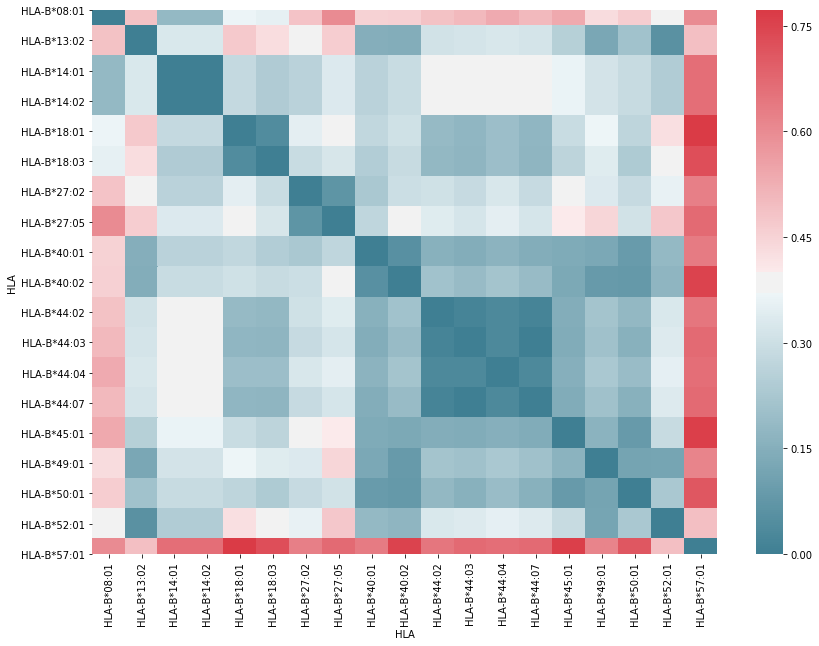

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(dm, xticklabels=dm.columns, yticklabels=dm.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)

## DBSCAN clustering

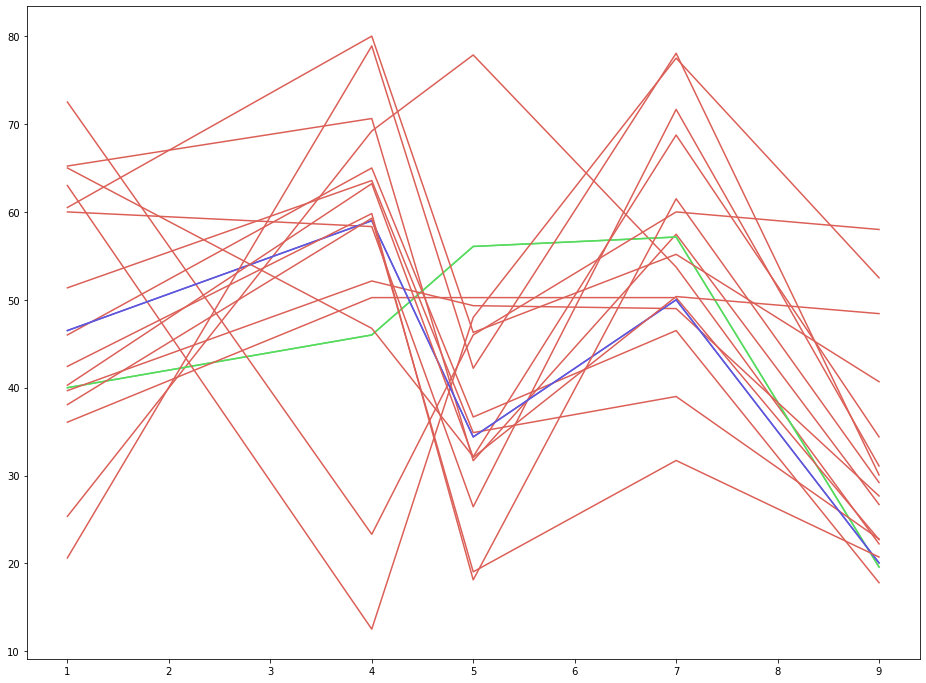

In [173]:
from sklearn.cluster import DBSCAN

X = np.array(profile)

clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clusters = clustering.labels_

profile['labels'] = clusters
profile['labels'] = profile['labels'] + 1

fig, ax = plt.subplots(figsize=(16,12))
for i, row in profile.iterrows():
    ax.plot(row[:5], c=sns.color_palette('hls', 3)[int(row['labels'])])
    
plt.show()

## Clustermap: clustering function within seaborn
Clustering algorithm is based on the `scipy.cluster.hierarchy.linkage` package. [Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

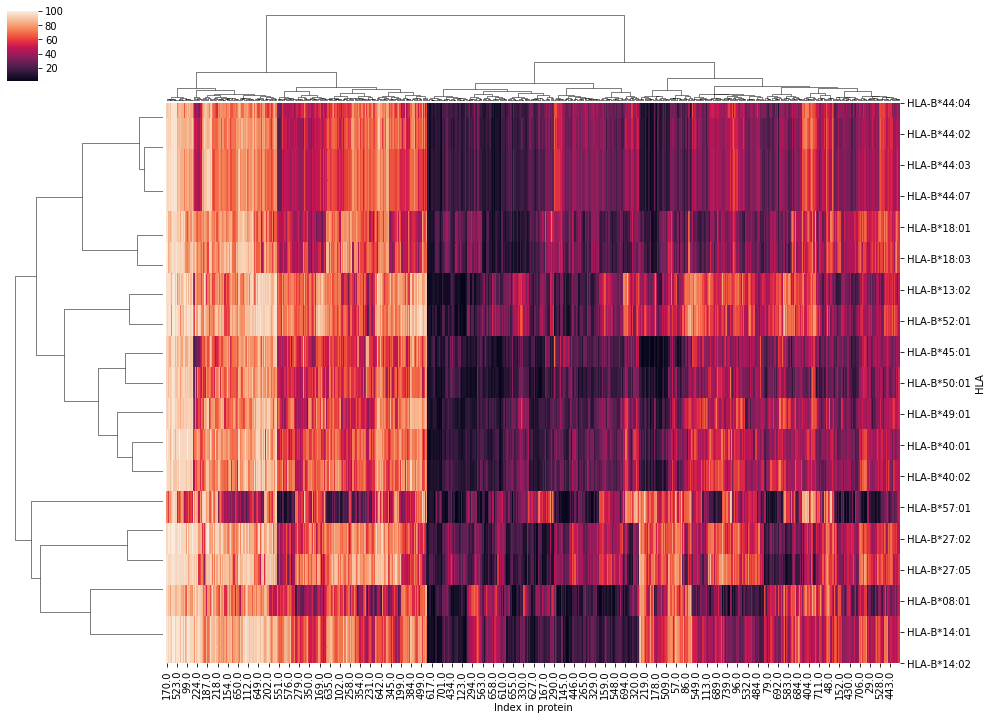

In [185]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

sns.clustermap(profile, method='ward', figsize=(16,12))
plt.show()